In [5]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

## Read data

In [14]:
import pandas as pd
data = json.load(open(json_path, 'r'))
df = pd.DataFrame(data).T[['lung-cancer-subtyping', 'AJCC_PATHOLOGIC_TUMOR_STAGE_reduced', 'purity', 'FRACTION_GENOME_ALTERED']]
df.columns = ['lung-cancer-subtyping', 'AJCC_PATHOLOGIC_TUMOR_STAGE_reduced', 'purity', 'FRACTION_GENOME_ALTERED']
df = df.apply(lambda x: x.apply(lambda y: y['label'] if isinstance(y, dict) else y))
df

,lung-cancer-subtyping,AJCC_PATHOLOGIC_TUMOR_STAGE_reduced,purity,FRACTION_GENOME_ALTERED
0,lusc,Early Stage,0.48,0.2702
1,lusc,Early Stage,0.48,0.2702
2,normal,None,0.00,NaN
3,normal,None,0.00,NaN
4,lusc,Early Stage,0.29,0.2552
...,...,...,...,...
407,lusc,Late Stage,0.53,0.3365
408,luad,Early Stage,0.50,0.5443
409,lusc,Late Stage,0.52,0.4490
410,lusc,Late Stage,0.75,0.5598


In [15]:
df.to_csv('label_stats.csv')

## Label statistics

In [7]:
json_path = '/home/phanthc/Chi/Code/BII-ITH-Viz/data/Subtyping-Staging-Purity-FGA.json'
data = json.load(open(json_path, 'r'))

In [ ]:
label_counts = defaultdict(lambda: defaultdict(int))
continuous_data = defaultdict(list)

In [ ]:
for _, tasks in data.items():
    for task_name, task_data in tasks.items():
        if task_name == "lung-cancer-subtyping" or task_name == "AJCC_PATHOLOGIC_TUMOR_STAGE_reduced":
            label_counts[task_name][task_data['label']] += 1            
        else:
            continuous_data[task_name].append(task_data['label'])

print(label_counts["lung-cancer-subtyping"])
print((label_counts['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced']))
print(len(continuous_data['purity']))
print(len(continuous_data['FRACTION_GENOME_ALTERED']))


defaultdict(<class 'int'>, {'lusc': 166, 'normal': 92, None: 8, 'luad': 146})
defaultdict(<class 'int'>, {'Early Stage': 258, None: 105, 'Late Stage': 49})
412
412


In [120]:
subtyping = label_counts["lung-cancer-subtyping"]
print(subtyping)

defaultdict(<class 'int'>, {'lusc': 166, 'normal': 92, None: 8, 'luad': 146})


In [103]:
label_counts['AJCC_PATHOLOGIC_TUMOR_STAGE_reduced']

defaultdict(int, {'Early Stage': 258, None: 105, 'Late Stage': 49})

## Purity distribution

In [104]:
purity_values = continuous_data["purity"]

In [105]:
filtered_purity_values = [value for value in purity_values if value is not None]
num_null_values = len(purity_values) - len(filtered_purity_values)
print(f"Number of null values: {num_null_values}")
print(f"Number of non-null values: {len(filtered_purity_values)}")

Number of null values: 14
Number of non-null values: 398


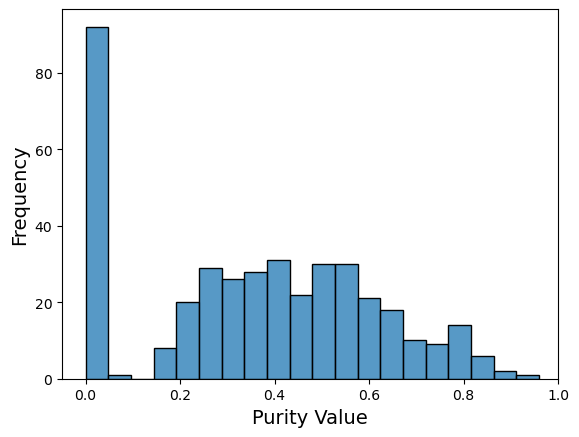

In [125]:
fig, axes = plt.subplots()
sns.histplot(data=filtered_purity_values, ax=axes, bins=20)
axes.set_xlabel('Purity Value',fontsize=14)
axes.set_ylabel('Frequency',fontsize=14)
axes.set_xlim(-0.05, 1)
# plt.title("Distribution of Purity (Excluding Null Values)", wrap=True,fontsize=14)
plt.show()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

## FGA Distribution

In [106]:
fga_values = continuous_data["FRACTION_GENOME_ALTERED"]

In [107]:
filtered_fga_values = [value for value in fga_values if value is not None]
num_null_values = len(purity_values) - len(filtered_fga_values)
print(f"Number of null values: {num_null_values}")
print(f"Number of non-null values: {len(filtered_fga_values)}")

Number of null values: 101
Number of non-null values: 311


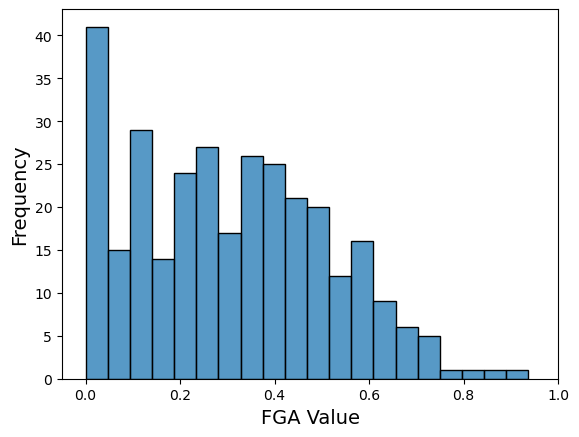

In [126]:
fig, axes = plt.subplots()
sns.histplot(data=filtered_fga_values, ax=axes, bins=20)
axes.set_xlabel('FGA Value',fontsize=14)
axes.set_ylabel('Frequency',fontsize=14)
axes.set_xlim(-0.05, 1)
# plt.title("Distribution of FGA (Excluding Null Values)", wrap=True,fontsize=14)
plt.show()
# axes.yaxis.grid(True)
# axes.xaxis.grid(True)

## Purity-FGA Correlation

In [129]:
purity_values = []
fga_values = []

for key, value in data.items():
    purity = value.get("purity", {}).get("label")
    fga = value.get("FRACTION_GENOME_ALTERED", {}).get("label")
    
    if purity is not None and fga is not None:
        purity_values.append(purity)
        fga_values.append(fga)



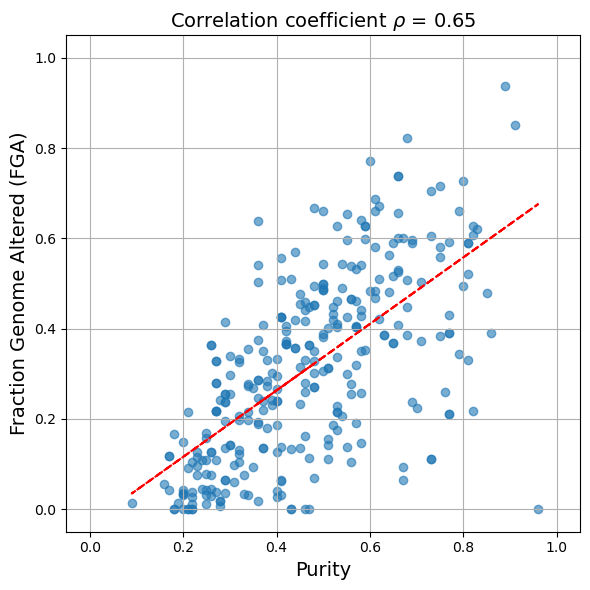

In [149]:
fit = np.polyfit(purity_values, fga_values, 1)
fit_fn = np.poly1d(fit)

plt.figure(figsize=(6, 6))
plt.scatter(purity_values, fga_values, alpha=0.6)
plt.plot(purity_values, fit_fn(purity_values), 'r--')

plt.xlim((-0.05, 1.05))
plt.xticks(np.arange(0, 1.05, 0.2))
plt.ylim((-0.05, 1.05))
plt.yticks(np.arange(0, 1.05, 0.2))
plt.title(r"Correlation coefficient $\rho$ = 0.65", fontsize=14)
plt.xlabel('Purity', fontsize=14)
plt.ylabel('Fraction Genome Altered (FGA)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [144]:
# Calculating the correlation coefficient
correlation_coefficient = np.corrcoef(purity_values, fga_values)[0, 1]
print(f"Correlation coefficient: {correlation_coefficient}")

Correlation coefficient: 0.6456014713971948


## Staging

,lung-cancer-subtyping,AJCC_PATHOLOGIC_TUMOR_STAGE_reduced,purity,FRACTION_GENOME_ALTERED
0,lusc,Early Stage,0.48,0.2702
1,lusc,Early Stage,0.48,0.2702
2,normal,None,0.00,NaN
3,normal,None,0.00,NaN
4,lusc,Early Stage,0.29,0.2552
...,...,...,...,...
407,lusc,Late Stage,0.53,0.3365
408,luad,Early Stage,0.50,0.5443
409,lusc,Late Stage,0.52,0.4490
410,lusc,Late Stage,0.75,0.5598


## Subtyping